This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray RADOLAN backend

In this example, we read RADOLAN data files using the xarray `radolan` backend.

In [1]:
import glob
import os
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as pl
import numpy as np
import xarray as xr

try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

/home/runner/micromamba-root/envs/wradlib-notebooks/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load RADOLAN Data

In [2]:
fpath = "radolan/misc/raa01-rw_10000-1408030950-dwd---bin.gz"
f = wrl.util.get_wradlib_data_file(fpath)
comp = wrl.io.open_radolan_dataset(f)

### Inspect Data

In [3]:
display(comp)

<xarray.Dataset>
Dimensions:  (y: 900, x: 900, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2014-08-03T09:50:00
  * y        (y) float64 -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    RW       (y, x) float32 ...
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.13.1
    radarlocations:  ['boo', 'ros', 'emd', 'hnr', 'pro', 'ess', 'asd', 'neu',...

### Plotting

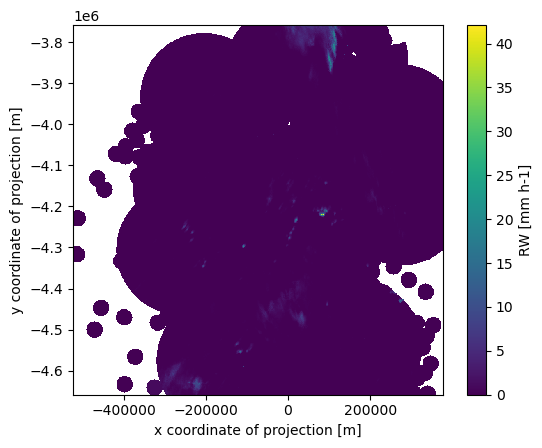

In [4]:
comp.RW.plot.pcolormesh(x="x", y="y")
pl.gca().set_aspect("equal")

### Inspect RADOLAN moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset.

In [5]:
display(comp.RW)

<xarray.DataArray 'RW' (y: 900, x: 900)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y        (y) float64 -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Attributes:
    valid_min:      0
    valid_max:      4095
    standard_name:  rainfall_rate
    long_name:      RW
    unit:           mm h-1

### Create simple plot

Using xarray features a simple plot can be created like this.

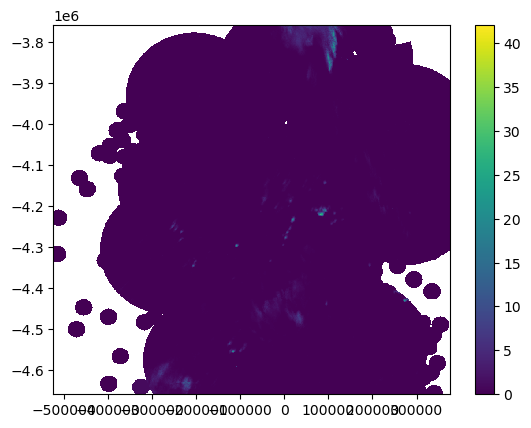

In [6]:
comp.RW.plot(x="x", y="y", add_labels=False)

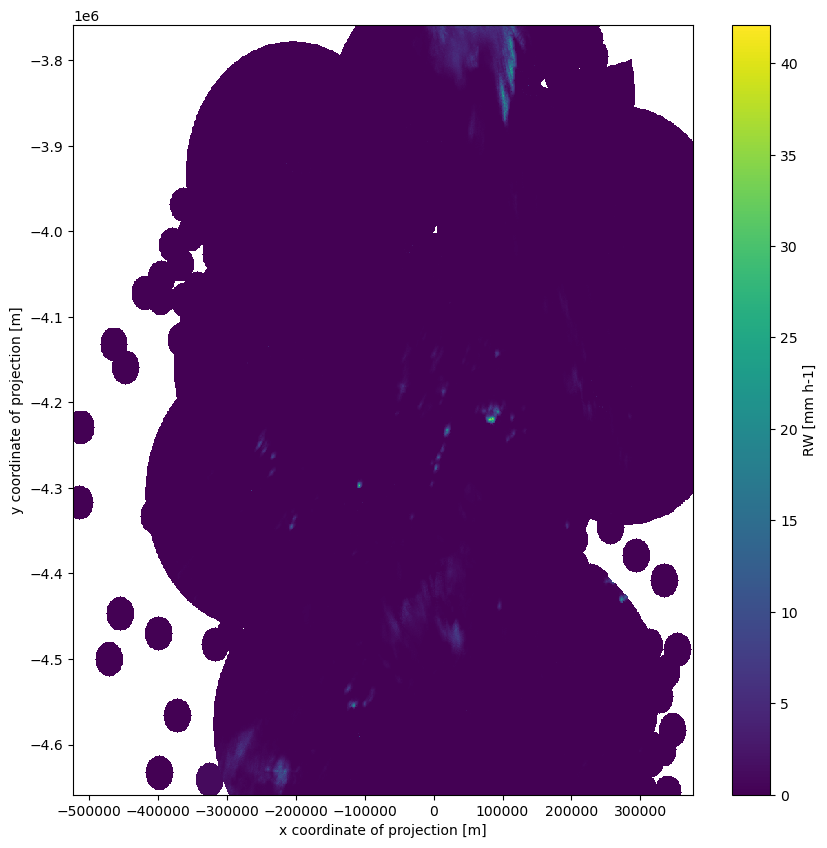

In [7]:
fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
comp.RW.plot(x="x", y="y", ax=ax)

### Mask some values

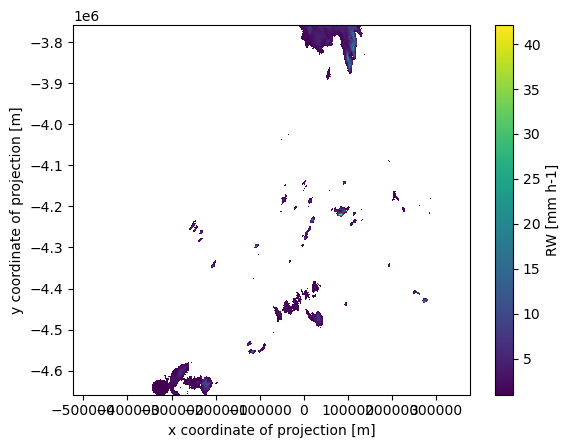

In [8]:
ds = comp["RW"].where(comp["RW"] >= 1)
ds.plot()

### Export to NetCDF4

In [9]:
# fix _FillValue
comp.RW.encoding["_FillValue"] = 65535

In [10]:
comp.to_netcdf("test_radolan.nc")

### Import again

In [11]:
comp1 = xr.open_dataset("test_radolan.nc")
comp1

<xarray.Dataset>
Dimensions:  (y: 900, x: 900, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2014-08-03T09:50:00
  * y        (y) float64 -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    RW       (y, x) float32 ...
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.13.1
    radarlocations:  ['boo', 'ros', 'emd', 'hnr', 'pro', 'ess', 'asd', 'neu',...

### Check equality

In [12]:
xr.testing.assert_equal(comp, comp1)

## More RADOLAN loading mechanisms

### Use `xr.open_dataset`


In [13]:
comp2 = xr.open_dataset(f, engine="radolan")
display(comp2)

<xarray.Dataset>
Dimensions:  (y: 900, x: 900, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2014-08-03T09:50:00
  * y        (y) float64 -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    RW       (y, x) float32 ...
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.13.1
    radarlocations:  ['boo', 'ros', 'emd', 'hnr', 'pro', 'ess', 'asd', 'neu',...

### Use `xr.open_mfdataset` to retrieve timeseries

In [14]:
# fpath = 'radolan/misc/raa01-rw_10000-1408030950-dwd---bin.gz'
fpath = wrl.util.get_wradlib_data_path()
f = os.path.join(fpath, "radolan/misc/raa01-sf_10000-1305*.gz")

In [15]:
comp3 = xr.open_mfdataset(f, engine="radolan")
display(comp3)

<xarray.Dataset>
Dimensions:  (time: 2, y: 900, x: 900)
Coordinates:
  * time     (time) datetime64[ns] 2013-05-27T00:50:00 2013-05-28T00:50:00
  * y        (y) float64 -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    SF       (time, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.12.0
    radarlocations:  ['ham', 'ros', 'emd', 'han', 'bln', 'ess', 'fld', 'drs',...
    radardays:       ['bln 24', 'drs 24', 'eis 24', 'emd 24', 'ess 24', 'fld ...